In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Random forest code

In [ ]:
# Random Forest
# Time taken: 13 mins

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the classifier
clf_rfeDoS = RandomForestClassifier(n_jobs=-1)
clf_rfeDoS_features = RandomForestClassifier(n_jobs=-1)
clf_rfeProbe = RandomForestClassifier(n_jobs=-1)
clf_rfeProbe_features = RandomForestClassifier(n_jobs=-1)
clf_rfeR2L = RandomForestClassifier(n_jobs=-1)
clf_rfeR2L_features = RandomForestClassifier(n_jobs=-1)
clf_rfeU2R = RandomForestClassifier(n_jobs=-1)
clf_rfeU2R_features = RandomForestClassifier(n_jobs=-1)

stratified_k_fold = StratifiedKFold(n_splits=5)

# Create GridSearchCV
grid_search_DoS = GridSearchCV(clf_rfeDoS, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_DoS_features = GridSearchCV(clf_rfeDoS_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_Probe = GridSearchCV(clf_rfeProbe, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_Probe_features = GridSearchCV(clf_rfeProbe_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_R2L = GridSearchCV(clf_rfeR2L, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_R2L_features = GridSearchCV(clf_rfeR2L_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_U2R = GridSearchCV(clf_rfeU2R, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')
grid_search_U2R_features = GridSearchCV(clf_rfeU2R_features, param_grid, cv=stratified_k_fold, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search_DoS.fit(X_DoS, Y_DoS.astype(int))
grid_search_DoS_features.fit(X_newDoS, Y_DoS.astype(int))
grid_search_Probe.fit(X_Probe, Y_Probe.astype(int))
grid_search_Probe_features.fit(X_newProbe, Y_Probe.astype(int))
grid_search_R2L.fit(X_R2L, Y_R2L.astype(int))
grid_search_R2L_features.fit(X_newR2L, Y_R2L.astype(int))
grid_search_U2R.fit(X_U2R, Y_U2R.astype(int))
grid_search_U2R_features.fit(X_newU2R, Y_U2R.astype(int))

# Print the best parameters
print("Best parameters for DoS classifier:", grid_search_DoS.best_params_)
print("Best parameters for DoS classifier with features:", grid_search_DoS_features.best_params_)
print("Best parameters for Probe classifier:", grid_search_Probe.best_params_)
print("Best parameters for Probe classifier with features:", grid_search_Probe_features.best_params_)
print("Best parameters for R2L classifier:", grid_search_R2L.best_params_)
print("Best parameters for R2L classifier with features:", grid_search_R2L_features.best_params_)
print("Best parameters for U2R classifier:", grid_search_U2R.best_params_)
print("Best parameters for U2R classifier with features:", grid_search_U2R_features.best_params_)

# Use the best estimator for further predictions
clf_rfeDoS_best = grid_search_DoS.best_estimator_
clf_rfeDoS_features_best = grid_search_DoS_features.best_estimator_
clf_rfeProbe_best = grid_search_Probe.best_estimator_
clf_rfeProbe_features_best = grid_search_Probe_features.best_estimator_
clf_rfeR2L_best = grid_search_R2L.best_estimator_
clf_rfeR2L_features_best = grid_search_R2L_features.best_estimator_
clf_rfeU2R_best = grid_search_U2R.best_estimator_
clf_rfeU2R_features_best = grid_search_U2R_features.best_estimator_

Best parameters for DoS classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for DoS classifier with features: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for Probe classifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Probe classifier with features: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for R2L classifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for R2L classifier with features: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for U2R classifier: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best parameters for U2R classifier with features: {'max_depth': None, 'min_samples_leaf': 1, 'm

## Random Forest Evaluation

### DoS Evaluation

Confusion Matrix:
[[9630   81]
 [2424 5036]]
Accuracy of DoS Prediction: 0.854


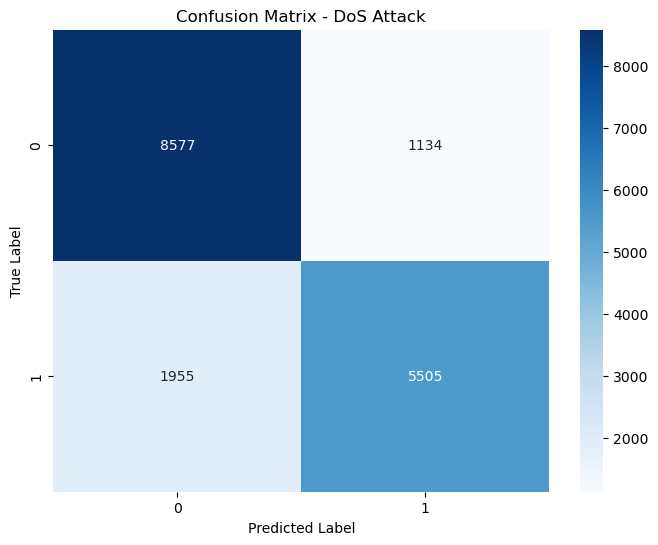

Classification Report for DoS:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88      9711
           1       0.98      0.68      0.80      7460

    accuracy                           0.85     17171
   macro avg       0.89      0.83      0.84     17171
weighted avg       0.88      0.85      0.85     17171



In [ ]:
# Predict the labels for the test data using the random tree model
Y_DoS_rfepred = clf_rfeDoS_best.predict(X_DoS_test)

# Create the confusion matrix
cm = confusion_matrix(Y_DoS_test, Y_DoS_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of DoS Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for DoS:")
print(classification_report(Y_DoS_test, Y_DoS_rfepred))

### DoS Evaluation with feature selection

Confusion Matrix:
[[9281  430]
 [2385 5075]]
Accuracy of DoS Prediction with feature selection: 0.836


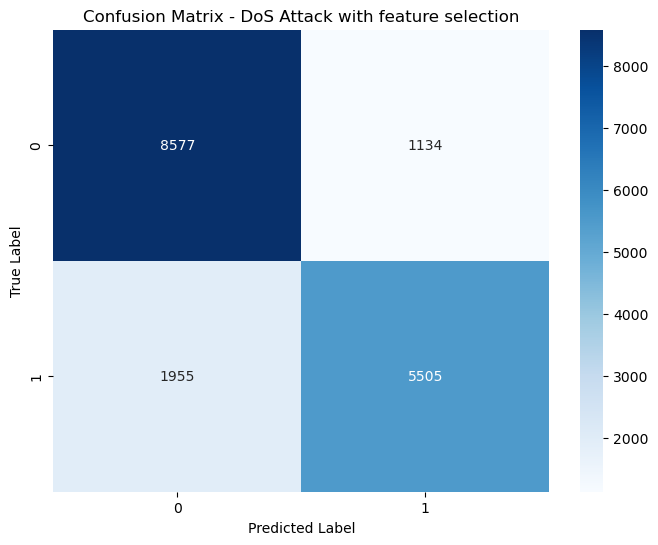

Classification Report for DoS with feature selection:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87      9711
           1       0.92      0.68      0.78      7460

    accuracy                           0.84     17171
   macro avg       0.86      0.82      0.83     17171
weighted avg       0.85      0.84      0.83     17171



In [ ]:
# Predict the labels for the test data using the random tree model
Y_DoS_rfepred_features = clf_rfeDoS_features_best.predict(X_newDoS_test)

# Create the confusion matrix
cm = confusion_matrix(Y_DoS_test, Y_DoS_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of DoS Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - DoS Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for DoS with feature selection:")
print(classification_report(Y_DoS_test, Y_DoS_rfepred_features))

### Probe prediction

Confusion Matrix:
[[9422  289]
 [ 979 1442]]
Accuracy of Probe Prediction: 0.895


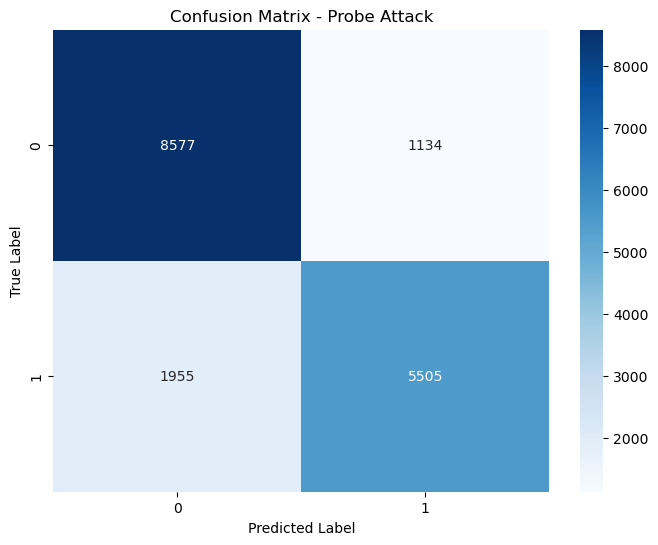

Classification Report for Probe:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9711
           2       0.83      0.60      0.69      2421

    accuracy                           0.90     12132
   macro avg       0.87      0.78      0.82     12132
weighted avg       0.89      0.90      0.89     12132



In [ ]:
# Predict the labels for the test data
Y_probe_rfepred = clf_rfeProbe_best.predict(X_Probe_test)

# Create the confusion matrix
cm = confusion_matrix(Y_Probe_test, Y_probe_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of Probe Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_DoS, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for Probe:")
print(classification_report(Y_Probe_test, Y_probe_rfepred))

### Probe prediction with feature selection

Confusion Matrix:
[[9459  252]
 [1124 1297]]
Accuracy of Probe Prediction with feature selection: 0.887


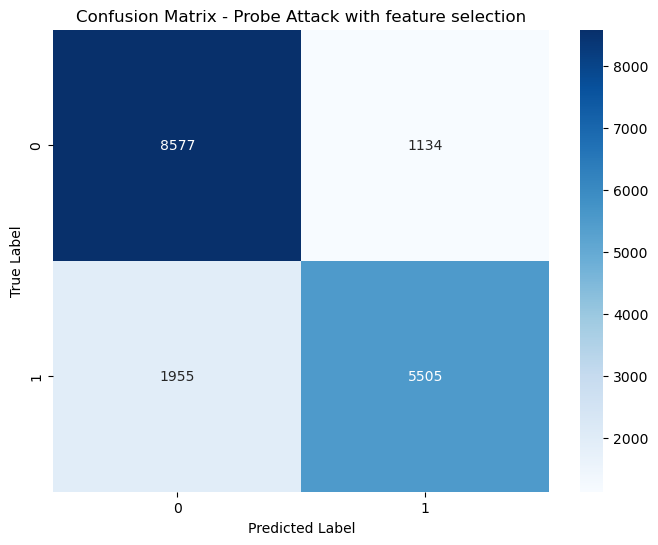

Classification Report for Probe with feature selection:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9711
           2       0.84      0.54      0.65      2421

    accuracy                           0.89     12132
   macro avg       0.87      0.75      0.79     12132
weighted avg       0.88      0.89      0.88     12132



In [ ]:
# Predict the labels for the test data using the random tree model
Y_Probe_rfepred_features = clf_rfeProbe_features_best.predict(X_newProbe_test)

# Create the confusion matrix
cm = confusion_matrix(Y_Probe_test, Y_Probe_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of Probe Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Probe Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for Probe with feature selection:")
print(classification_report(Y_Probe_test, Y_Probe_rfepred_features))

### R2L prediction

Confusion Matrix:
[[9711    0]
 [2885    0]]
Accuracy of R2L Prediction: 0.771


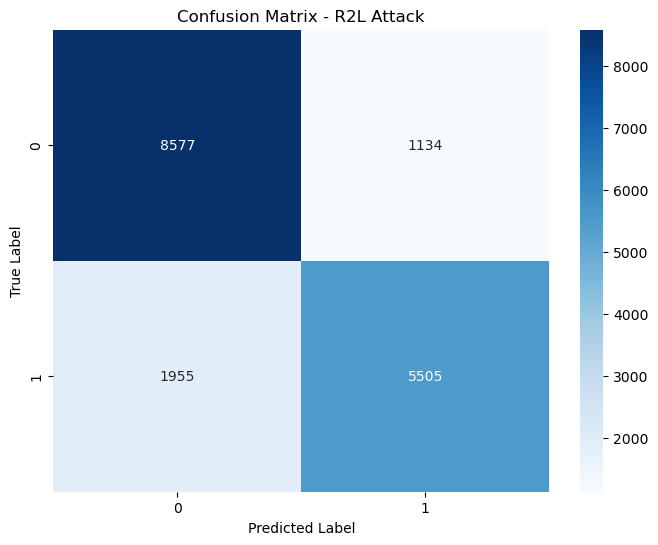

Classification Report for R2L:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       0.00      0.00      0.00      2885

    accuracy                           0.77     12596
   macro avg       0.39      0.50      0.44     12596
weighted avg       0.59      0.77      0.67     12596



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# Predict the labels for the test data
Y_R2L_rfepred = clf_rfeR2L_best.predict(X_R2L_test)

# Create the confusion matrix
cm = confusion_matrix(Y_R2L_test, Y_R2L_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of R2L Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for R2L:")
print(classification_report(Y_R2L_test, Y_R2L_rfepred))

### R2L prediction with feature selection

Confusion Matrix:
[[9711    0]
 [2861   24]]
Accuracy of R2L Prediction with feature selection: 0.773


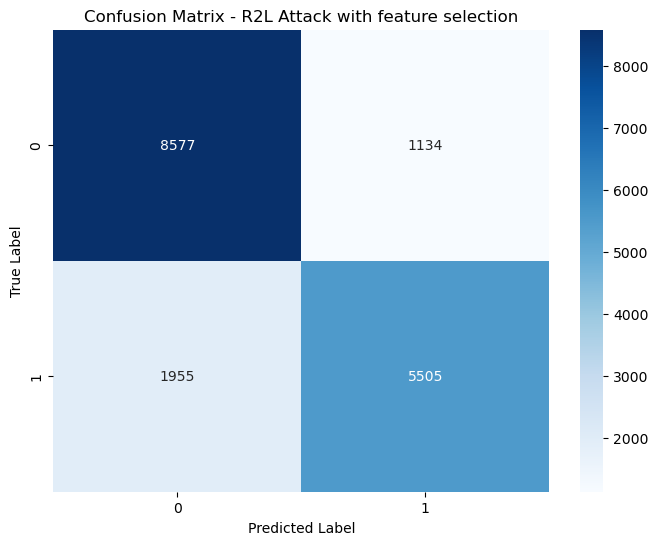

Classification Report for R2L with feature selection:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      9711
           3       1.00      0.01      0.02      2885

    accuracy                           0.77     12596
   macro avg       0.89      0.50      0.44     12596
weighted avg       0.82      0.77      0.68     12596



In [ ]:
# Predict the labels for the test data using the random tree model
Y_R2L_rfepred_features = clf_rfeR2L_features_best.predict(X_newR2L_test)

# Create the confusion matrix
cm = confusion_matrix(Y_R2L_test, Y_R2L_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of R2L Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - R2L Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for R2L with feature selection:")
print(classification_report(Y_R2L_test, Y_R2L_rfepred_features))

### U2R prediction

Confusion Matrix:
[[9711    0]
 [  67    0]]
Accuracy of U2R Prediction: 0.993


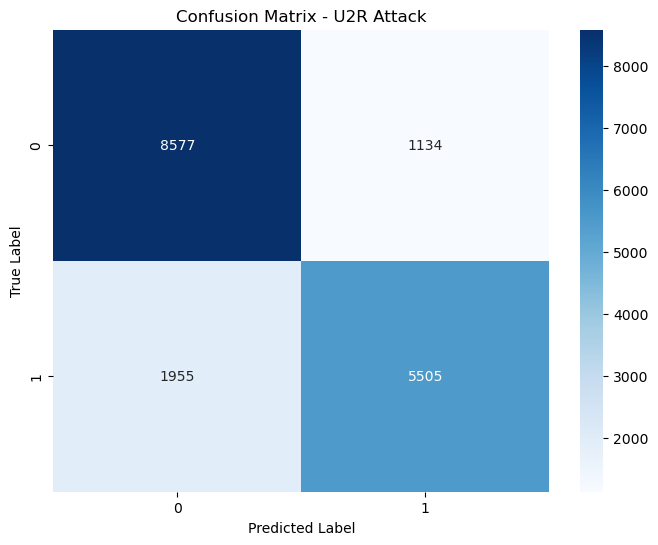

Classification Report for U2R:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.00      0.00      0.00        67

    accuracy                           0.99      9778
   macro avg       0.50      0.50      0.50      9778
weighted avg       0.99      0.99      0.99      9778



/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kaialogen/anaconda3/envs/Test-Mac/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [ ]:
# Predict the labels for the test data
Y_U2R_rfepred = clf_rfeU2R_best.predict(X_U2R_test)

# Create the confusion matrix
cm = confusion_matrix(Y_U2R_test, Y_U2R_rfepred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of U2R Prediction:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for U2R:")
print(classification_report(Y_U2R_test, Y_U2R_rfepred))

### U2R prediction with feature selection

Confusion Matrix:
[[9708    3]
 [  61    6]]
Accuracy of U2R Prediction with feature selection: 0.993


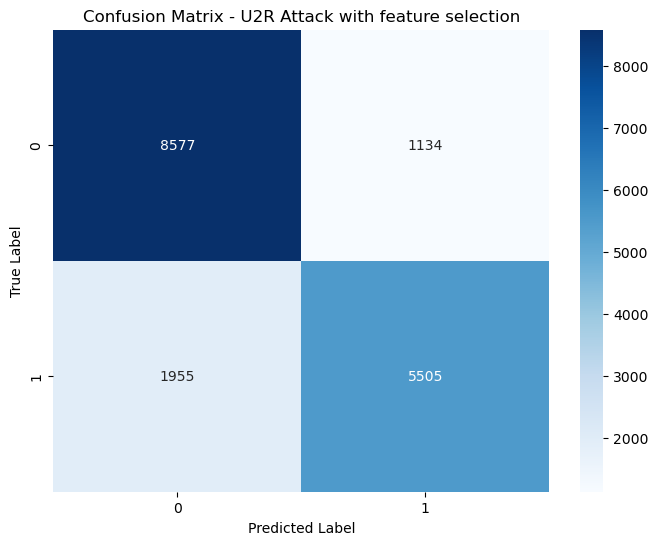

Classification Report for U2R with feature selection:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9711
           4       0.67      0.09      0.16        67

    accuracy                           0.99      9778
   macro avg       0.83      0.54      0.58      9778
weighted avg       0.99      0.99      0.99      9778



In [ ]:
# Predict the labels for the test data using the random tree model
Y_U2R_rfepred_features = clf_rfeU2R_features_best.predict(X_newU2R_test)

# Create the confusion matrix
cm = confusion_matrix(Y_U2R_test, Y_U2R_rfepred_features)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)
print("Accuracy of U2R Prediction with feature selection:", round((cm[0,0] + cm[1,1]) / cm.sum(), 3))

# Visualise the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - U2R Attack with feature selection")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Evaluate the performance of the Random Forest model
print("Classification Report for U2R with feature selection:")
print(classification_report(Y_U2R_test, Y_U2R_rfepred_features))